In [29]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np
from statistics import mean
from scipy.spatial import distance
import math

In [30]:
iris = datasets.load_iris()
x0 = iris.data

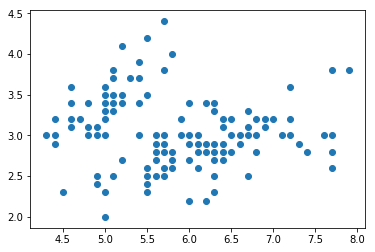

In [31]:
x=np.array([x0[:,0],x0[:,1]]).T
x=np.unique(x,axis=0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [32]:
def cluster_center(k,S):
    cc=x[np.random.randint(S.shape[0], size=k), :]
    return cc

In [33]:
def manhattan_distance(x,y):
        distance=0
        distance += abs(x[0] - y[0]) + abs(x[1]-y[1])
        return distance   

In [41]:
def plot(cluster):
    color=['b','g','r','c','m','y']
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)  
    for key in cluster.keys():
        b=np.array(cluster[key])
        ax.scatter(b[:,0],b[:,1],color=color[key],s=30)

In [42]:
def cost_cal(cc,c,cluster,k,S):
    for i in range(0,len(S)):
        min_dist=[]
        for j in range(0,k):
            dis=manhattan_distance(S[i,:],cc[j,:])
            min_dist.append(dis)
        c+=min(min_dist)
        m=min_dist.index(min(min_dist))
        cluster[m].append(list(S[i,:]))
    return cluster,c

In [43]:
def kmedoids(k,S):   
    c1=0
    c2=0
    cluster1={}
    cluster2={}
    cc1=np.array(cluster_center(k,S))
    for r in range(0,k):
        cluster1[r]=[] 
        cluster2[r]=[]
    for i in range(0,k):
        cluster1,c1=cost_cal(cc1,c1,cluster1,k,S)
        c=cluster_center(1,S)
        while((c==cc1).any()):
            c=cluster_center(1,S)
        cc2=cc1
        cc2[i]=c
        cluster2,c2=cost_cal(cc2,c2,cluster2,k,S)
        if(c2-c1<0):
            cc1=cc2
            cluster1=cluster2
            c1=c2
    return c1,cc1,cluster1

In [44]:
#length of data is 150
def clara(q,s,m):
    mincost=0
    for i in range(q):
        S=x[np.random.randint(x.shape[0], size=s), :]
        cost,cluster_center,cluster=kmedoids(m,S)
        if(cost < mincost):
            mincost=cost
    plot(cluster)

        

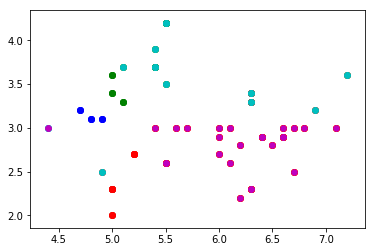

In [45]:
clara(100,50,5)